<a href="https://colab.research.google.com/github/ShubhPathania/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Shubham Pathania




# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/ShubhPathania/Zomato-Restaurant-Clustering-and-Sentiment-Analysis

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
try:
  zomato_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/Module - 6/Project Datasets/Zomato Restaurant names and Metadata.csv")
  reviews_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Projects/Module - 6/Project Datasets/Zomato Restaurant reviews.csv")
  print("Dataset loaded successfully.")
except:
  print("Some Error occured.")

Dataset loaded successfully.


### Dataset First View

In [4]:
# Dataset First Look
zomato_df_first_look = zomato_df.head()
zomato_df_first_look

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
reviews_df_first_look = reviews_df.head()
reviews_df_first_look

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

# Rows and coulumn count for zomato_df
zdf_num_rows, zdf_num_columns = zomato_df.shape

print("\033[1m\033[3mZomato Restaurant Dataset\033[0m:")
print(f"Number of Rows: {zdf_num_rows}\nNumber of Columns: {zdf_num_columns}\n\n{'--'*18}")

# Rows and coulumn count for reviews_df
rdf_num_rows, rdf_num_columns = reviews_df.shape

print("\n\033[1m\033[3mZomato Restaurant Reviews Dataset\033[0m:")
print(f"Number of Rows:{rdf_num_rows}\nNumber of Columns: {rdf_num_columns}\n")

Zomato Restaurant Dataset:
Number of Rows: 105
Number of Columns: 6

------------------------------------

Zomato Restaurant Reviews Dataset:
Number of Rows:10000
Number of Columns: 7



### Dataset Information

In [7]:
# Dataset Info for zomato_df
print("----> \033[1m\033[4mRestaurant Info:\033[0m\n")
zomato_df.info()

print(f"\n{'--'*20}\n")

# Dataset Info for reviews_df
print("----> \033[1m\033[4mReviews Info:\033[0m\n")
reviews_df.info()

----> Restaurant Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB

----------------------------------------

----> Reviews Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures

#### Duplicate Values

In [8]:
# Duplicate values in 'zomato_df'
print("Number of duplicate values in zomato_df:", zomato_df.duplicated().sum())

# Duplicate values in 'reviews_df'
print("Number of duplicate values in reviews_df:", reviews_df.duplicated().sum())

Number of duplicate values in zomato_df: 0
Number of duplicate values in reviews_df: 36


In [9]:
# Duplicate value Count for each column in 'zomato_df'
zomato_dup = zomato_df.apply(lambda x: x.duplicated().sum())
print("Number of duplicate values for each column in 'zomato_df':\n")
print(f"{zomato_dup}\n\n{'--'*30}")

# Duplicate value Count for each column in 'reviews_df'
reviews_dup = reviews_df.apply(lambda x: x.duplicated().sum())
print("\nNumber of duplicate values for each column in 'reviews_df':\n")
print(reviews_dup)

Number of duplicate values for each column in 'zomato_df':

Name            0
Links           0
Cost           76
Collections    62
Cuisines       13
Timings        27
dtype: int64

------------------------------------------------------------

Number of duplicate values for each column in 'reviews_df':

Restaurant    9900
Reviewer      2553
Review         635
Rating        9989
Metadata      7522
Time           217
Pictures      9964
dtype: int64


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count in 'zomato_df'
zomato_null = zomato_df.isnull().sum()
print("Number of missing values for each column in 'zomato_df':\n")
print(zomato_null, f"\nTotal number of missing values: {zomato_df.isnull().sum().sum()}")

print("--"*28)

# Missing Values/Null Values Count in 'reviews_df'
reviews_null = reviews_df.isnull().sum()
print("\nNumber of missing values for each column in 'reviews_df':\n")
print(reviews_null, f"\nTotal number of missing values: {reviews_df.isnull().sum().sum()}")

Number of missing values for each column in 'zomato_df':

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 
Total number of missing values: 55
--------------------------------------------------------

Number of missing values for each column in 'reviews_df':

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64 
Total number of missing values: 197


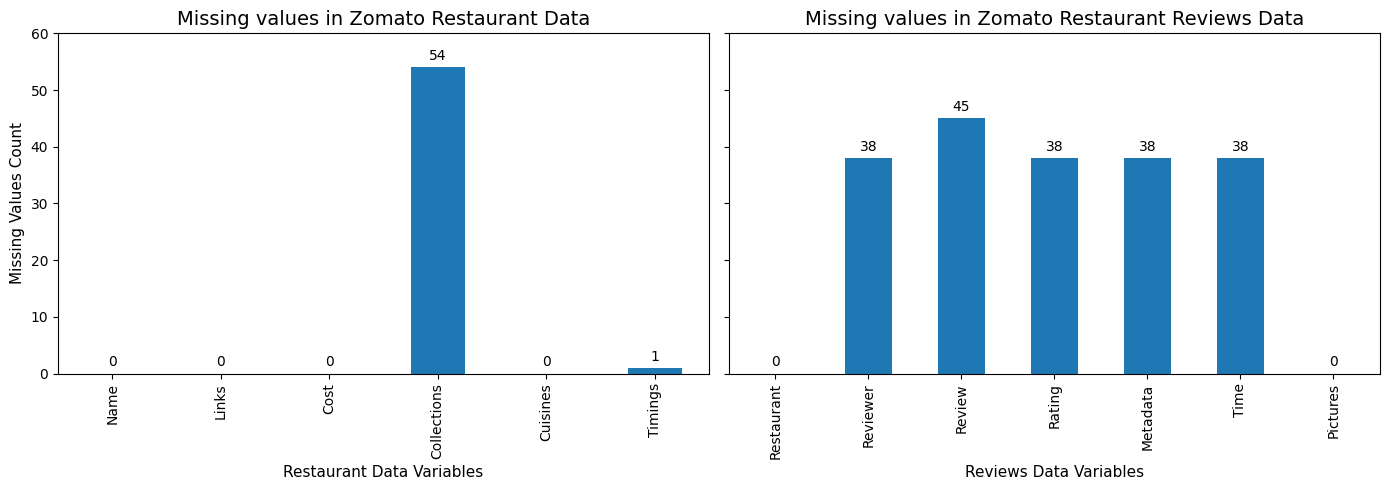

In [11]:
# Visualizing the missing values
fig, axes = plt.subplots(1, 2, figsize= (14, 5), sharey= True)

# Plot for Zomato Restaurant Data
bars1 = zomato_null.plot(kind='bar', ax= axes[0])
axes[0].set_title("Missing values in Zomato Restaurant Data", size= 14)
axes[0].set_ylim(0, 60)
axes[0].set_xlabel("Restaurant Data Variables", size= 11)
axes[0].set_ylabel("Missing Values Count", size= 11)

# Annotate bars for Zomato Restaurant Data
for bar in bars1.patches:
  height = bar.get_height()
  axes[0].annotate(f'{int(height)}', xy= (bar.get_x() + bar.get_width() / 2, height),
                   xytext= (0, 3), textcoords="offset points", ha='center', va='bottom')

# Plot for Zomato Restaurant Reviews Data
bars2 = reviews_null.plot(kind='bar', ax= axes[1])
axes[1].set_title("Missing values in Zomato Restaurant Reviews Data", size= 14)
axes[1].set_xlabel("Reviews Data Variables", size= 11)
axes[1].set_ylim(0, 60)

# Annotate bars for Zomato Restaurant Reviews Data
for bar in bars2.patches:
  height = bar.get_height()
  axes[1].annotate(f'{int(height)}', xy= (bar.get_x() + bar.get_width() / 2, height),
                   xytext= (0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
# Summary of Dataset
def restaurant_info(df):
  col = pd.DataFrame(index= df.columns)
  col["data_type"] = df.dtypes
  col["duplicate_count"] = df.duplicated().sum()
  col["missing/Null values"] = df.isnull().sum()
  col["count of non_null_values"] = df.count()

  return col

In [13]:
print("\t\t\t\033[1m\033[36mSummary of Zomato Restaurant Dataset\033[0m\n")
restaurant_info(zomato_df)

			Summary of Zomato Restaurant Dataset



,data_type,duplicate_count,missing/Null values,count of non_null_values
Name,object,0,0,105
Links,object,0,0,105
Cost,object,0,0,105
Collections,object,0,54,51
Cuisines,object,0,0,105
Timings,object,0,1,104


In [14]:
print("\t\t\t\033[1m\033[36mSummary of Zomato Restaurant Reviews Dataset\033[0m\n")
restaurant_info(reviews_df)

			Summary of Zomato Restaurant Reviews Dataset



,data_type,duplicate_count,missing/Null values,count of non_null_values
Restaurant,object,36,0,10000
Reviewer,object,36,38,9962
Review,object,36,45,9955
Rating,object,36,38,9962
Metadata,object,36,38,9962
Time,object,36,38,9962
Pictures,int64,36,0,10000


### What did you know about your dataset?

From the Data Exploration we have done so far, we come to know that;

- The **zomato restaurant dataset** has ***105 rows*** and ***6 columns***.
- The **zomato restaurant reviews** dataset has ***10,000 rows*** and ***7 columns***.

Additionally, several data quality issues were found in both datasets:

**1. Incorrect DataTypes:**
  - In the Zomato restaurant dataset, all columns appear to be of object datatype. However, it is observed that the `'cost'` column contains all integer values. Therefore, it is necessary to convert it to the integer datatype.

  - In the Zomato restaurant reviews dataset, there is only one column with integer datatype, and the rest are of object datatype. However, it is observed that the `'Rating'` column contains all integer values, and the `'Time'` column contains date and time. Therefore, it is necessary to convert them to their respective datatypes (`Rating` to `int64` and `Time` to `datetime`).

**2. Duplicate Values:**
  - There were no duplicate rows in the Zomato restaurant dataset. However, the Zomato restaurant reviews dataset has 36 duplicate rows.

**3. Missing Values:**
  - In the Zomato restaurant dataset, there are 55 missing values. Specifically, the `'Timings'` column has 1 missing value, and the `'Collection'` column has 54 missing/null values.

  - In the Zomato restaurant reviews dataset, there are 197 missing values. The `'Review'` column has 45 missing values, while the `'Reviewer'`, `'Rating'`, `'Metadata'`, and `'Time'` columns each have 38 missing values.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
print("\033[1m\033[3mVariables of Zomato restaurant dataset:\033[0m\n")
restaurant_columns = zomato_df.columns.to_list()
for column in restaurant_columns:
  print(column)

print("--"*23)

print("\n\033[1m\033[3mVariables of Zomato restaurant reviews dataset:\033[0m\n")
reviews_columns = reviews_df.columns.to_list()
for column in reviews_columns:
  print(column)

Variables of Zomato restaurant dataset:

Name
Links
Cost
Collections
Cuisines
Timings
----------------------------------------------

Variables of Zomato restaurant reviews dataset:

Restaurant
Reviewer
Review
Rating
Metadata
Time
Pictures


In [16]:
# Dataset Describe
zomato_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [17]:
reviews_df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

**Variables Description for Zomato Restaurant Dataset:**

1. **Name:** The name of the restaurant.
2. **Links:** The URL link to the restaurant's page on Zomato.
3. **Cost:** The average dining cost per visit to the restaurant.
4. **Collections:** The collections or tags associated with the restaurant on Zomato.
5. **Cuisines:** The types of cuisines offered by the restaurant.
6. **Timings:**  The operating hours of the restaurant.

**Variables Description for Zomato Restaurant Reviews Dataset:**

1. **Restaurant:** The name of the restaurant being reviewed.
2. **Reviewer:** The name of the reviewer.
3. **Review:** The text of the review posted by the reviewer.
4. **Rating:** The rating given by the reviewer, on a scale of 1 to 5.
5. **Metadata:** The information about the reviewer, such as (number of reviews and the number of followers they have on Zomato).
6. **Time:** The date and time when the review was posted.
7. **Pictures:** The number of pictures attched in the review.

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
print("\033[1m\033[3mZomato Restaurant Data >\033[0m\n\n\033[36mNumber of unique values in:\033[0m")
for column in zomato_df.columns.to_list():
  print(f"{column}: {zomato_df[column].nunique()}")

print(f"\n{'--'*17}\n")

print("\033[1m\033[3mZomato Restaurant Reviews Data >\033[0m\n\n\033[36mNumber of unique values in:\033[0m")
for column in reviews_df.columns.to_list():
  print(f"{column}: {reviews_df[column].nunique()}")

Zomato Restaurant Data >

Number of unique values in:
Name: 105
Links: 105
Cost: 29
Collections: 42
Cuisines: 92
Timings: 77

----------------------------------

Zomato Restaurant Reviews Data >

Number of unique values in:
Restaurant: 100
Reviewer: 7446
Review: 9364
Rating: 10
Metadata: 2477
Time: 9782
Pictures: 36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [21]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [22]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [23]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [24]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [25]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [26]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [27]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [28]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [29]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [30]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [31]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [32]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [33]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [34]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [39]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [40]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [41]:
# Expand Contraction

#### 2. Lower Casing

In [42]:
# Lower Casing

#### 3. Removing Punctuations

In [43]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [44]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [45]:
# Remove Stopwords

In [46]:
# Remove White spaces

#### 6. Rephrase Text

In [47]:
# Rephrase Text

#### 7. Tokenization

In [48]:
# Tokenization

#### 8. Text Normalization

In [49]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [50]:
# POS Taging

#### 10. Text Vectorization

In [51]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [52]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [53]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [54]:
# Transform Your data

### 6. Data Scaling

In [55]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [56]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [57]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [58]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [59]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [64]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [67]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [68]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***